# SFRD from all data

In this notebook, we present the final version of the calculation of SFRD from various literaute, from both UV and IR based data. Although the procedure to do so was explained in other notebooks, we summarised it very briefly here: we first find the luminosity functions at various redshifts from the literature. We then just integrate this function to estimate the luminosity density. While multiplying with proper conversion factor $\kappa$ (which can be found from different literature) we can get the star formation rate density as a function of redshift.

A note on our calculations: while computing SFRD, we used $0.03L_*$ as the lower limit of mentioned integration, where $L_*$ is a characteristic luminosity from the luminosity function (this is the luminosity from where the luminosity function change its shape), except in the case of Gruppioni et al. 2020 and Koprowski et al. 2017 -- in case of Gruppioni et al. 2020, we have assumed the integration over the whole range of luminosities following the same paper. On the other hand, to match the results with the corresponding literature, in the case of Koprowski et al. 2017, we used $0.01L_*$ as the lower limit. In addition to this, in Koprowski et al. 2017, they assumed Chebrier IMF instead of widely used Salpeter IMF; this lead a change in the conversion factor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils as utl
import astropy.constants as con
import astropy.units as u
import os

The code we used to compute SFRDs can be found in the [repository](https://github.com/Jayshil/csfrd) of the project.

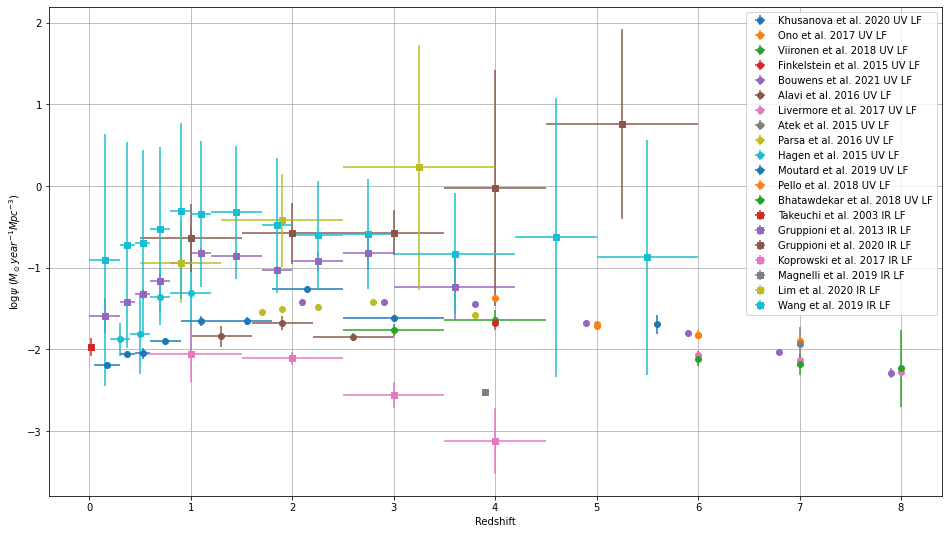

In [2]:
ppr_uv = np.array(['Khusanova_et_al._2020', 'Ono_et_al._2017', 'Viironen_et_al._2018', 'Finkelstein_et_al._2015', 'Bouwens_et_al._2021', 'Alavi_et_al._2016', 'Livermore_et_al._2017', 'Atek_et_al._2015', 'Parsa_et_al._2016', 'Hagen_et_al._2015', 'Moutard_et_al._2019', 'Pello_et_al._2018', 'Bhatawdekar_et_al._2018'])
ppr_ir = np.array(['Takeuchi_et_al._2003', 'Gruppioni_et_al._2013', 'Gruppioni_et_al._2020', 'Koprowski_et_al._2017', 'Magnelli_et_al._2019', 'Lim_et_al._2020', 'Wang_et_al._2019'])

ppr_all = np.hstack((ppr_uv, ppr_ir))

# Loading data
ppr_all1, spec = np.loadtxt('sfrd_new_all.dat', usecols=(0,5), unpack=True, dtype=str)
zd_all, zu_all, sfrd_all, sfrd_all_err = np.loadtxt('sfrd_new_all.dat', usecols=(1,2,3,4), unpack=True)
zcen_all = (zd_all + zu_all)/2
zup, zdo = np.abs(zu_all - zcen_all), np.abs(zcen_all - zd_all)
log_sfrd_all, log_sfrd_all_err = utl.log_err(sfrd_all, sfrd_all_err)

# Plotting them
plt.figure(figsize=(16, 9))
for i in range(len(ppr_all)):
    zc_all, zp, zn, lg_sf, lg_sfe, sp1 = np.array([]), np.array([]), np.array([]), np.array([]), np.array([]), np.array([])
    for j in range(len(ppr_all1)):
        if ppr_all1[j] == ppr_all[i]:
            zc_all = np.hstack((zc_all, zcen_all[j]))
            lg_sf = np.hstack((lg_sf, log_sfrd_all[j]))
            lg_sfe = np.hstack((lg_sfe, log_sfrd_all_err[j]))
            zp = np.hstack((zp, zup[j]))
            zn = np.hstack((zn, zdo[j]))
            sp1 = np.hstack((sp1, spec[j]))
            #print(sp1)
    if sp1[0] == 'UV':
        plt.errorbar(zc_all, lg_sf, xerr=[zn, zp], yerr=lg_sfe, label=ppr_all[i].replace('_',' ') + ' UV LF', fmt='o')
    elif sp1[0] == 'IR':
        plt.errorbar(zc_all, lg_sf, xerr=[zn, zp], yerr=lg_sfe, label=ppr_all[i].replace('_',' ') + ' IR LF', fmt='o', marker='s')

#plt.plot(znew, psi2, label='Best fitted function')
plt.xlabel('Redshift')
plt.ylabel(r'$\log{\psi}$ ($M_\odot year^{-1} Mpc^{-3}$)')
plt.grid()
plt.legend(loc='best')

Let's overplot the best-fitted functions as well...

In [3]:
# Model
def psi_new(z, aa, bb, cc, dd):
    ab = (1+z)**bb
    cd = ((1+z)/cc)**dd
    ef = aa*ab/(1+cd)
    return ef

# Values of the best-fitted parameters
val_uv = np.array([0.00601144, 1.37193109, 4.94478103, 5.22447988])
val_ir = np.array([0.015, 2.7, 2.9, 5.6])

znew = np.linspace(0,9,1000)

# For UV
psi1_uv = psi_new(znew, *val_uv)
psi2_uv = np.log10(psi1_uv)

# For IR
psi1_ir = psi_new(znew, *val_ir)
psi2_ir = np.log10(psi1_ir)

# Summation
psi3 = psi1_uv + psi1_ir
psi3_all = np.log10(psi3)

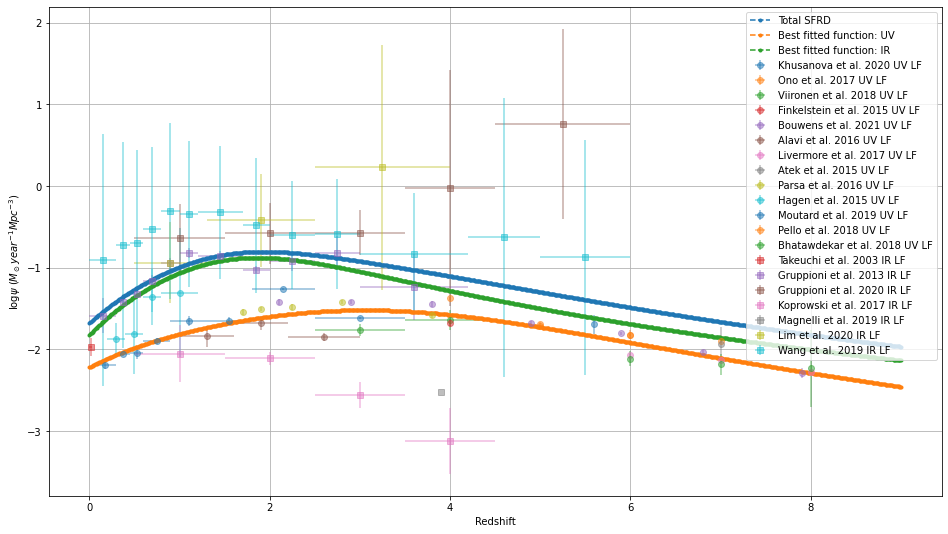

In [4]:
# Plotting them
plt.figure(figsize=(16, 9))
for i in range(len(ppr_all)):
    zc_all, zp, zn, lg_sf, lg_sfe, sp1 = np.array([]), np.array([]), np.array([]), np.array([]), np.array([]), np.array([])
    for j in range(len(ppr_all1)):
        if ppr_all1[j] == ppr_all[i]:
            zc_all = np.hstack((zc_all, zcen_all[j]))
            lg_sf = np.hstack((lg_sf, log_sfrd_all[j]))
            lg_sfe = np.hstack((lg_sfe, log_sfrd_all_err[j]))
            zp = np.hstack((zp, zup[j]))
            zn = np.hstack((zn, zdo[j]))
            sp1 = np.hstack((sp1, spec[j]))
            #print(sp1)
    if sp1[0] == 'UV':
        plt.errorbar(zc_all, lg_sf, xerr=[zn, zp], yerr=lg_sfe, label=ppr_all[i].replace('_',' ') + ' UV LF', fmt='o', alpha=0.5)
    elif sp1[0] == 'IR':
        plt.errorbar(zc_all, lg_sf, xerr=[zn, zp], yerr=lg_sfe, label=ppr_all[i].replace('_',' ') + ' IR LF', fmt='o', marker='s', alpha=0.5)


plt.plot(znew, psi3_all, label='Total SFRD', marker='.', ls='--')
plt.plot(znew, psi2_uv, label='Best fitted function: UV', marker='.', ls='--')
plt.plot(znew, psi2_ir, label='Best fitted function: IR', marker='.', ls='--')
plt.xlabel('Redshift')
plt.ylabel(r'$\log{\psi}$ ($M_\odot year^{-1} Mpc^{-3}$)')
plt.grid()
plt.legend(loc='best')